# Document description
In this notebook we run the VMSP algorithm with different minimum supports, to be able to tune the minimum support.

# Import

In [1]:
from spmf import Spmf
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import ast
pd.options.plotting.backend = "plotly"
import plotly.express as px
from chart_studio import plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.subplots as sp
pd.options.display.max_colwidth = None
pd.set_option('display.max_rows', 70)

# Tests

In [8]:
spmf = Spmf("VMSP", input_filename="/home/s164574/motifs_and_competition_in_app_usage/20sec_sessions_0_01_removed_without_split.txt",
            output_filename="/home/s164574/motifs_and_competition_in_app_usage/output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_1.txt",
            spmf_bin_location_dir="/home/s164574/motifs_and_competition_in_app_usage/",
            arguments=[0.001])
spmf.run()
print(spmf.to_pandas_dataframe(pickle=True))
spmf.to_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_1.csv")

>/home/s164574/motifs_and_competition_in_app_usage/spmf.jar
=============  VMSP v0.97 - STATISTICS =============
 Total time ~ 2700763 ms
 Frequent sequences count : 1123
 Max memory (mb) : 16597.8954467773441123
minsup 52643
Intersection count 11215 


                                       pattern     sup
0                                      [66375]   82713
1                                      [66136]  135309
2                                      [65957]  100274
3                                      [65471]  128913
4                                      [65457]   59863
...                                        ...     ...
1118  [23949, 7649, 23949, 23949, 7649, 23949]   66174
1119  [23949, 23949, 7649, 23949, 7649, 23949]   52815
1120  [23949, 7649, 23949, 7649, 23949, 23949]   56967
1121   [23949, 7649, 23949, 7649, 23949, 7649]   79597
1122   [7649, 23949, 7649, 23949, 7649, 23949]   57362

[1123 rows x 2 columns]


To be able to interpret the discovered patterns the app codes are translated to their corresponding package names

In [9]:
data = pd.read_csv('sorted_coded_data.csv')
app_dict=dict(zip(data.app_code, data.package_name))

In [10]:
output=pd.read_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_1.csv",delimiter=';')
output['pattern']=output.pattern.apply(lambda l: [app_dict[int(i)] for i in ast.literal_eval(l)])
output=output.sort_values(['sup'],ascending=False)
output['pattern_length']=output.pattern.apply(lambda l: len(l))
output.to_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_1_translated.csv",index=False)

In [4]:
output=pd.read_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_1_translated.csv")

In [24]:
test=output[output.pattern_length==6]
test[[0,1,2,3,4,5]]=test.pattern.str.replace('[','').str.replace(']','').str.replace('\'','').str.split(',',expand=True)

<ipython-input-24-b51ba3a332a8>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  test[[0,1,2,3,4,5]]=test.pattern.str.replace('[','').str.replace(']','').str.replace('\'','').str.split(',',expand=True)
/home/s164574/.conda/envs/myenv/lib/python3.8/site-packages/pandas/core/frame.py:3636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [25]:
test.to_csv("test.csv",index=False)

In [11]:
print("Number of frequent patterns of length 1:",len(output[output.pattern_length==1]))
print("Max lengths of frequent patterns:",output.pattern_length.max())

Number of frequent patterns of length 1: 94
Max lengths of frequent patterns: 6


In [12]:
spmf = Spmf("VMSP", input_filename="/home/s164574/motifs_and_competition_in_app_usage/20sec_sessions_0_01_removed_without_split.txt",
            output_filename="/home/s164574/motifs_and_competition_in_app_usage/output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_1.txt",
            spmf_bin_location_dir="/home/s164574/motifs_and_competition_in_app_usage/",
            arguments=[0.01])
spmf.run()
print(spmf.to_pandas_dataframe(pickle=True))
spmf.to_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_1.csv")

>/home/s164574/motifs_and_competition_in_app_usage/spmf.jar
=============  VMSP v0.97 - STATISTICS =============
 Total time ~ 515163 ms
 Frequent sequences count : 80
 Max memory (mb) : 14272.13662719726680
minsup 526429
Intersection count 403 


                 pattern      sup
0                [53996]  1074492
1                [45846]  1590487
2                [45284]   860977
3                [45246]   783659
4                [36529]   787773
..                   ...      ...
75  [23949, 7649, 23949]  1194735
76  [19968, 23949, 7649]   637146
77  [19968, 7649, 19968]   810573
78   [7649, 23949, 7649]   627769
79   [23949, 7649, 7649]   560004

[80 rows x 2 columns]


In [13]:
output=pd.read_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_1.csv",delimiter=';')
output['pattern']=output.pattern.apply(lambda l: [app_dict[int(i)] for i in ast.literal_eval(l)])
output=output.sort_values(['sup'],ascending=False)
output['pattern_length']=output.pattern.apply(lambda l: len(l))
output.to_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_1_translated.csv",index=False)

In [14]:
print("Number of frequent patterns of length 1:",len(output[output.pattern_length==1]))
print("Max lengths of frequent patterns:",output.pattern_length.max())

Number of frequent patterns of length 1: 12
Max lengths of frequent patterns: 3


In [15]:
spmf = Spmf("VMSP", input_filename="/home/s164574/motifs_and_competition_in_app_usage/20sec_sessions_0_01_removed_without_split.txt",
            output_filename="/home/s164574/motifs_and_competition_in_app_usage/output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_95.txt",
            spmf_bin_location_dir="/home/s164574/motifs_and_competition_in_app_usage/",
            arguments=[0.0095])
spmf.run()
print(spmf.to_pandas_dataframe(pickle=True))
spmf.to_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_95.csv")

>/home/s164574/motifs_and_competition_in_app_usage/spmf.jar
=============  VMSP v0.97 - STATISTICS =============
 Total time ~ 543618 ms
 Frequent sequences count : 84
 Max memory (mb) : 14233.91006469726684
minsup 500108
Intersection count 415 


                 pattern      sup
0                [53996]  1074492
1                [49042]   523172
2                [45846]  1590487
3                [45284]   860977
4                [45246]   783659
..                   ...      ...
79  [19968, 23949, 7649]   637146
80  [23949, 7649, 19968]   519576
81  [19968, 7649, 19968]   810573
82   [23949, 7649, 7649]   560004
83   [7649, 23949, 7649]   627769

[84 rows x 2 columns]


In [16]:
output=pd.read_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_95.csv",delimiter=';')
output['pattern']=output.pattern.apply(lambda l: [app_dict[int(i)] for i in ast.literal_eval(l)])
output=output.sort_values(['sup'],ascending=False)
output['pattern_length']=output.pattern.apply(lambda l: len(l))
output.to_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_95_translated.csv",index=False)

In [17]:
print("Number of frequent patterns of length 1:",len(output[output.pattern_length==1]))
print("Max lengths of frequent patterns:",output.pattern_length.max())

Number of frequent patterns of length 1: 14
Max lengths of frequent patterns: 3


In [18]:
spmf = Spmf("VMSP", input_filename="/home/s164574/motifs_and_competition_in_app_usage/20sec_sessions_0_01_removed_without_split.txt",
            output_filename="/home/s164574/motifs_and_competition_in_app_usage/output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_9.txt",
            spmf_bin_location_dir="/home/s164574/motifs_and_competition_in_app_usage/",
            arguments=[0.009])
spmf.run()
print(spmf.to_pandas_dataframe(pickle=True))
spmf.to_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_9.csv")

>/home/s164574/motifs_and_competition_in_app_usage/spmf.jar
=============  VMSP v0.97 - STATISTICS =============
 Total time ~ 511408 ms
 Frequent sequences count : 90
 Max memory (mb) : 14192.91181182861390
minsup 473786
Intersection count 434 


                 pattern      sup
0                [53996]  1074492
1                [49042]   523172
2                [45846]  1590487
3                [45284]   860977
4                [45246]   783659
..                   ...      ...
85  [19968, 7649, 19968]   810573
86   [23949, 7649, 7649]   560004
87   [7649, 23949, 7649]   627769
88   [7649, 19968, 7649]   478989
89    [7649, 7649, 7649]   480170

[90 rows x 2 columns]


In [19]:
output=pd.read_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_9.csv",delimiter=';')
output['pattern']=output.pattern.apply(lambda l: [app_dict[int(i)] for i in ast.literal_eval(l)])
output=output.sort_values(['sup'],ascending=False)
output['pattern_length']=output.pattern.apply(lambda l: len(l))
output.to_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_9_translated.csv",index=False)

In [20]:
print("Number of frequent patterns of length 1:",len(output[output.pattern_length==1]))
print("Max lengths of frequent patterns:",output.pattern_length.max())

Number of frequent patterns of length 1: 15
Max lengths of frequent patterns: 3


In [21]:
spmf = Spmf("VMSP", input_filename="/home/s164574/motifs_and_competition_in_app_usage/20sec_sessions_0_01_removed_without_split.txt",
            output_filename="/home/s164574/motifs_and_competition_in_app_usage/output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_85.txt",
            spmf_bin_location_dir="/home/s164574/motifs_and_competition_in_app_usage/",
            arguments=[0.0085])
spmf.run()
print(spmf.to_pandas_dataframe(pickle=True))
spmf.to_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_85.csv")

>/home/s164574/motifs_and_competition_in_app_usage/spmf.jar
=============  VMSP v0.97 - STATISTICS =============
 Total time ~ 553603 ms
 Frequent sequences count : 95
 Max memory (mb) : 14185.15042877197395
minsup 447465
Intersection count 488 


                 pattern      sup
0                [53996]  1074492
1                [49042]   523172
2                [45846]  1590487
3                [45327]   460532
4                [45284]   860977
..                   ...      ...
90  [19968, 7649, 19968]   810573
91   [7649, 23949, 7649]   627769
92   [23949, 7649, 7649]   560004
93   [7649, 19968, 7649]   478989
94    [7649, 7649, 7649]   480170

[95 rows x 2 columns]


In [22]:
output=pd.read_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_85.csv",delimiter=';')
output['pattern']=output.pattern.apply(lambda l: [app_dict[int(i)] for i in ast.literal_eval(l)])
output=output.sort_values(['sup'],ascending=False)
output['pattern_length']=output.pattern.apply(lambda l: len(l))
output.to_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_85_translated.csv",index=False)

In [23]:
print("Number of frequent patterns of length 1:",len(output[output.pattern_length==1]))
print("Max lengths of frequent patterns:",output.pattern_length.max())

Number of frequent patterns of length 1: 15
Max lengths of frequent patterns: 3


In [24]:
spmf = Spmf("VMSP", input_filename="/home/s164574/motifs_and_competition_in_app_usage/20sec_sessions_0_01_removed_without_split.txt",
            output_filename="/home/s164574/motifs_and_competition_in_app_usage/output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_8.txt",
            spmf_bin_location_dir="/home/s164574/motifs_and_competition_in_app_usage/",
            arguments=[0.008])
spmf.run()
print(spmf.to_pandas_dataframe(pickle=True))
spmf.to_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_8.csv")

>/home/s164574/motifs_and_competition_in_app_usage/spmf.jar
=============  VMSP v0.97 - STATISTICS =============
 Total time ~ 598427 ms
 Frequent sequences count : 108
 Max memory (mb) : 14273.31216430664108
minsup 421143
Intersection count 588 


                 pattern      sup
0                [65472]   427039
1                [53996]  1074492
2                [49042]   523172
3                [45846]  1590487
4                [45327]   460532
..                   ...      ...
103  [23949, 7649, 7649]   560004
104  [7649, 23949, 7649]   627769
105  [19968, 7649, 7649]   427342
106  [7649, 19968, 7649]   478989
107   [7649, 7649, 7649]   480170

[108 rows x 2 columns]


In [25]:
output=pd.read_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_8.csv",delimiter=';')
output['pattern']=output.pattern.apply(lambda l: [app_dict[int(i)] for i in ast.literal_eval(l)])
output=output.sort_values(['sup'],ascending=False)
output['pattern_length']=output.pattern.apply(lambda l: len(l))
output.to_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_8_translated.csv",index=False)

In [26]:
print("Number of frequent patterns of length 1:",len(output[output.pattern_length==1]))
print("Max lengths of frequent patterns:",output.pattern_length.max())

Number of frequent patterns of length 1: 17
Max lengths of frequent patterns: 3


In [27]:
spmf = Spmf("VMSP", input_filename="/home/s164574/motifs_and_competition_in_app_usage/20sec_sessions_0_01_removed_without_split.txt",
            output_filename="/home/s164574/motifs_and_competition_in_app_usage/output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_75.txt",
            spmf_bin_location_dir="/home/s164574/motifs_and_competition_in_app_usage/",
            arguments=[0.0075])
spmf.run()
print(spmf.to_pandas_dataframe(pickle=True))
spmf.to_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_75.csv")

>/home/s164574/motifs_and_competition_in_app_usage/spmf.jar
=============  VMSP v0.97 - STATISTICS =============
 Total time ~ 671259 ms
 Frequent sequences count : 115
 Max memory (mb) : 16200.174240112305115
minsup 394822
Intersection count 663 


                 pattern      sup
0                [65472]   427039
1                [53996]  1074492
2                [49042]   523172
3                [45846]  1590487
4                [45327]   460532
..                   ...      ...
110  [23949, 7649, 7649]   560004
111  [7649, 23949, 7649]   627769
112  [19968, 7649, 7649]   427342
113  [7649, 19968, 7649]   478989
114   [7649, 7649, 7649]   480170

[115 rows x 2 columns]


In [28]:
output=pd.read_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_75.csv",delimiter=';')
output['pattern']=output.pattern.apply(lambda l: [app_dict[int(i)] for i in ast.literal_eval(l)])
output=output.sort_values(['sup'],ascending=False)
output['pattern_length']=output.pattern.apply(lambda l: len(l))
output.to_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_75_translated.csv",index=False)

In [29]:
print("Number of frequent patterns of length 1:",len(output[output.pattern_length==1]))
print("Max lengths of frequent patterns:",output.pattern_length.max())

Number of frequent patterns of length 1: 18
Max lengths of frequent patterns: 3


In [30]:
spmf = Spmf("VMSP", input_filename="/home/s164574/motifs_and_competition_in_app_usage/20sec_sessions_0_01_removed_without_split.txt",
            output_filename="/home/s164574/motifs_and_competition_in_app_usage/output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_7.txt",
            spmf_bin_location_dir="/home/s164574/motifs_and_competition_in_app_usage/",
            arguments=[0.007])
spmf.run()
print(spmf.to_pandas_dataframe(pickle=True))
spmf.to_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_7.csv")

>/home/s164574/motifs_and_competition_in_app_usage/spmf.jar
=============  VMSP v0.97 - STATISTICS =============
 Total time ~ 708364 ms
 Frequent sequences count : 130
 Max memory (mb) : 16545.53606414795130
minsup 368500
Intersection count 778 


                        pattern      sup
0                       [65472]   427039
1                       [53996]  1074492
2                       [49042]   523172
3                       [45846]  1590487
4                       [45327]   460532
..                          ...      ...
125         [7649, 7649, 19968]   371044
126         [19968, 7649, 7649]   427342
127         [7649, 19968, 7649]   478989
128          [7649, 7649, 7649]   480170
129  [23949, 7649, 23949, 7649]   392972

[130 rows x 2 columns]


In [31]:
output=pd.read_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_7.csv",delimiter=';')
output['pattern']=output.pattern.apply(lambda l: [app_dict[int(i)] for i in ast.literal_eval(l)])
output=output.sort_values(['sup'],ascending=False)
output['pattern_length']=output.pattern.apply(lambda l: len(l))
output.to_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_7_translated.csv",index=False)

In [32]:
print("Number of frequent patterns of length 1:",len(output[output.pattern_length==1]))
print("Max lengths of frequent patterns:",output.pattern_length.max())

Number of frequent patterns of length 1: 20
Max lengths of frequent patterns: 4


In [33]:
spmf = Spmf("VMSP", input_filename="/home/s164574/motifs_and_competition_in_app_usage/20sec_sessions_0_01_removed_without_split.txt",
            output_filename="/home/s164574/motifs_and_competition_in_app_usage/output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_65.txt",
            spmf_bin_location_dir="/home/s164574/motifs_and_competition_in_app_usage/",
            arguments=[0.0065])
spmf.run()
print(spmf.to_pandas_dataframe(pickle=True))
spmf.to_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_65.csv")

>/home/s164574/motifs_and_competition_in_app_usage/spmf.jar
=============  VMSP v0.97 - STATISTICS =============
 Total time ~ 679218 ms
 Frequent sequences count : 136
 Max memory (mb) : 14354.177284240723136
minsup 342179
Intersection count 866 


                          pattern      sup
0                         [65472]   427039
1                         [59154]   357369
2                         [53996]  1074492
3                         [49042]   523172
4                         [45846]  1590487
..                            ...      ...
131           [7649, 7649, 19968]   371044
132           [7649, 19968, 7649]   478989
133            [7649, 7649, 7649]   480170
134  [53003, 19968, 53003, 19968]   344782
135    [23949, 7649, 23949, 7649]   392972

[136 rows x 2 columns]


In [34]:
output=pd.read_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_65.csv",delimiter=';')
output['pattern']=output.pattern.apply(lambda l: [app_dict[int(i)] for i in ast.literal_eval(l)])
output=output.sort_values(['sup'],ascending=False)
output['pattern_length']=output.pattern.apply(lambda l: len(l))
output.to_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_65_translated.csv",index=False)

In [35]:
print("Number of frequent patterns of length 1:",len(output[output.pattern_length==1]))
print("Max lengths of frequent patterns:",output.pattern_length.max())

Number of frequent patterns of length 1: 20
Max lengths of frequent patterns: 4


In [36]:
spmf = Spmf("VMSP", input_filename="/home/s164574/motifs_and_competition_in_app_usage/20sec_sessions_0_01_removed_without_split.txt",
            output_filename="/home/s164574/motifs_and_competition_in_app_usage/output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_6.txt",
            spmf_bin_location_dir="/home/s164574/motifs_and_competition_in_app_usage/",
            arguments=[0.006])
spmf.run()
print(spmf.to_pandas_dataframe(pickle=True))
spmf.to_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_6.csv")

>/home/s164574/motifs_and_competition_in_app_usage/spmf.jar
=============  VMSP v0.97 - STATISTICS =============
 Total time ~ 809714 ms
 Frequent sequences count : 146
 Max memory (mb) : 16835.67275238037146
minsup 315858
Intersection count 941 


                          pattern      sup
0                         [65472]   427039
1                         [59154]   357369
2                         [53996]  1074492
3                         [51657]   323309
4                         [49042]   523172
..                            ...      ...
141           [7649, 19968, 7649]   478989
142           [19968, 7649, 7649]   427342
143            [7649, 7649, 7649]   480170
144  [53003, 19968, 53003, 19968]   344782
145    [23949, 7649, 23949, 7649]   392972

[146 rows x 2 columns]


In [37]:
output=pd.read_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_6.csv",delimiter=';')
output['pattern']=output.pattern.apply(lambda l: [app_dict[int(i)] for i in ast.literal_eval(l)])
output=output.sort_values(['sup'],ascending=False)
output['pattern_length']=output.pattern.apply(lambda l: len(l))
output.to_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_6_translated.csv",index=False)

In [38]:
print("Number of frequent patterns of length 1:",len(output[output.pattern_length==1]))
print("Max lengths of frequent patterns:",output.pattern_length.max())

Number of frequent patterns of length 1: 21
Max lengths of frequent patterns: 4


In [39]:
spmf = Spmf("VMSP", input_filename="/home/s164574/motifs_and_competition_in_app_usage/20sec_sessions_0_01_removed_without_split.txt",
            output_filename="/home/s164574/motifs_and_competition_in_app_usage/output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_55.txt",
            spmf_bin_location_dir="/home/s164574/motifs_and_competition_in_app_usage/",
            arguments=[0.0055])
spmf.run()
print(spmf.to_pandas_dataframe(pickle=True))
spmf.to_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_55.csv")

>/home/s164574/motifs_and_competition_in_app_usage/spmf.jar
=============  VMSP v0.97 - STATISTICS =============
 Total time ~ 707803 ms
 Frequent sequences count : 155
 Max memory (mb) : 14338.39582824707155
minsup 289536
Intersection count 1031 


                          pattern      sup
0                         [65472]   427039
1                         [59154]   357369
2                         [53996]  1074492
3                         [51657]   323309
4                         [49042]   523172
..                            ...      ...
150           [19968, 7649, 7649]   427342
151            [7649, 7649, 7649]   480170
152  [53003, 19968, 53003, 19968]   344782
153  [19968, 53003, 19968, 53003]   299234
154    [23949, 7649, 23949, 7649]   392972

[155 rows x 2 columns]


In [40]:
output=pd.read_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_55.csv",delimiter=';')
output['pattern']=output.pattern.apply(lambda l: [app_dict[int(i)] for i in ast.literal_eval(l)])
output=output.sort_values(['sup'],ascending=False)
output['pattern_length']=output.pattern.apply(lambda l: len(l))
output.to_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_55_translated.csv",index=False)

In [41]:
print("Number of frequent patterns of length 1:",len(output[output.pattern_length==1]))
print("Max lengths of frequent patterns:",output.pattern_length.max())

Number of frequent patterns of length 1: 23
Max lengths of frequent patterns: 4


In [42]:
spmf = Spmf("VMSP", input_filename="/home/s164574/motifs_and_competition_in_app_usage/20sec_sessions_0_01_removed_without_split.txt",
            output_filename="/home/s164574/motifs_and_competition_in_app_usage/output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_5.txt",
            spmf_bin_location_dir="/home/s164574/motifs_and_competition_in_app_usage/",
            arguments=[0.005])
spmf.run()
print(spmf.to_pandas_dataframe(pickle=True))
spmf.to_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_5.csv")

>/home/s164574/motifs_and_competition_in_app_usage/spmf.jar
=============  VMSP v0.97 - STATISTICS =============
 Total time ~ 766407 ms
 Frequent sequences count : 174
 Max memory (mb) : 14240.029014587402174
minsup 263215
Intersection count 1190 


                          pattern      sup
0                         [65472]   427039
1                         [59154]   357369
2                         [53996]  1074492
3                         [51657]   323309
4                         [49042]   523172
..                            ...      ...
169           [7649, 7649, 19968]   371044
170            [7649, 7649, 7649]   480170
171  [19968, 53003, 19968, 53003]   299234
172  [53003, 19968, 53003, 19968]   344782
173    [23949, 7649, 23949, 7649]   392972

[174 rows x 2 columns]


In [43]:
output=pd.read_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_5.csv",delimiter=';')
output['pattern']=output.pattern.apply(lambda l: [app_dict[int(i)] for i in ast.literal_eval(l)])
output=output.sort_values(['sup'],ascending=False)
output['pattern_length']=output.pattern.apply(lambda l: len(l))
output.to_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_5_translated.csv",index=False)

In [44]:
print("Number of frequent patterns of length 1:",len(output[output.pattern_length==1]))
print("Max lengths of frequent patterns:",output.pattern_length.max())

Number of frequent patterns of length 1: 27
Max lengths of frequent patterns: 4


In [45]:
spmf = Spmf("VMSP", input_filename="/home/s164574/motifs_and_competition_in_app_usage/20sec_sessions_0_01_removed_without_split.txt",
            output_filename="/home/s164574/motifs_and_competition_in_app_usage/output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_45.txt",
            spmf_bin_location_dir="/home/s164574/motifs_and_competition_in_app_usage/",
            arguments=[0.0045])
spmf.run()
print(spmf.to_pandas_dataframe(pickle=True))
spmf.to_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_45.csv")

>/home/s164574/motifs_and_competition_in_app_usage/spmf.jar
=============  VMSP v0.97 - STATISTICS =============
 Total time ~ 897454 ms
 Frequent sequences count : 192
 Max memory (mb) : 15903.732650756836192
minsup 236893
Intersection count 1369 


                          pattern     sup
0                         [65472]  427039
1                         [59154]  357369
2                         [51657]  323309
3                         [50264]  244585
4                         [49042]  523172
..                            ...     ...
187  [19968, 53003, 19968, 53003]  299234
188  [53003, 19968, 53003, 19968]  344782
189   [23949, 7649, 23949, 23949]  256486
190    [23949, 7649, 23949, 7649]  392972
191    [7649, 23949, 7649, 23949]  259296

[192 rows x 2 columns]


In [46]:
output=pd.read_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_45.csv",delimiter=';')
output['pattern']=output.pattern.apply(lambda l: [app_dict[int(i)] for i in ast.literal_eval(l)])
output=output.sort_values(['sup'],ascending=False)
output['pattern_length']=output.pattern.apply(lambda l: len(l))
output.to_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_45_translated.csv",index=False)

In [47]:
print("Number of frequent patterns of length 1:",len(output[output.pattern_length==1]))
print("Max lengths of frequent patterns:",output.pattern_length.max())

Number of frequent patterns of length 1: 28
Max lengths of frequent patterns: 4


In [48]:
spmf = Spmf("VMSP", input_filename="/home/s164574/motifs_and_competition_in_app_usage/20sec_sessions_0_01_removed_without_split.txt",
            output_filename="/home/s164574/motifs_and_competition_in_app_usage/output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_4.txt",
            spmf_bin_location_dir="/home/s164574/motifs_and_competition_in_app_usage/",
            arguments=[0.004])
spmf.run()
print(spmf.to_pandas_dataframe(pickle=True))
spmf.to_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_4.csv")

>/home/s164574/motifs_and_competition_in_app_usage/spmf.jar
=============  VMSP v0.97 - STATISTICS =============
 Total time ~ 1008158 ms
 Frequent sequences count : 232
 Max memory (mb) : 16150.376747131348232
minsup 210572
Intersection count 1721 


                         pattern     sup
0                        [65472]  427039
1                        [59154]  357369
2                        [51657]  323309
3                        [50264]  244585
4                        [49042]  523172
..                           ...     ...
227  [23949, 23949, 7649, 23949]  234694
228  [19968, 23949, 7649, 23949]  224163
229   [23949, 7649, 7649, 23949]  225476
230   [7649, 23949, 7649, 23949]  259296
231   [23949, 7649, 23949, 7649]  392972

[232 rows x 2 columns]


In [49]:
output=pd.read_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_4.csv",delimiter=';')
output['pattern']=output.pattern.apply(lambda l: [app_dict[int(i)] for i in ast.literal_eval(l)])
output=output.sort_values(['sup'],ascending=False)
output['pattern_length']=output.pattern.apply(lambda l: len(l))
output.to_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_4_translated.csv",index=False)

In [50]:
print("Number of frequent patterns of length 1:",len(output[output.pattern_length==1]))
print("Max lengths of frequent patterns:",output.pattern_length.max())

Number of frequent patterns of length 1: 36
Max lengths of frequent patterns: 4


In [51]:
spmf = Spmf("VMSP", input_filename="/home/s164574/motifs_and_competition_in_app_usage/20sec_sessions_0_01_removed_without_split.txt",
            output_filename="/home/s164574/motifs_and_competition_in_app_usage/output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_35.txt",
            spmf_bin_location_dir="/home/s164574/motifs_and_competition_in_app_usage/",
            arguments=[0.0035])
spmf.run()
print(spmf.to_pandas_dataframe(pickle=True))
spmf.to_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_35.csv")

>/home/s164574/motifs_and_competition_in_app_usage/spmf.jar
=============  VMSP v0.97 - STATISTICS =============
 Total time ~ 969329 ms
 Frequent sequences count : 250
 Max memory (mb) : 14406.721794128418250
minsup 184250
Intersection count 1929 


                               pattern     sup
0                              [65472]  427039
1                              [59154]  357369
2                              [51657]  323309
3                              [50264]  244585
4                              [49042]  523172
..                                 ...     ...
245        [19968, 23949, 7649, 23949]  224163
246        [19968, 23949, 7649, 19968]  206746
247        [19968, 19968, 7649, 19968]  186937
248         [19968, 7649, 19968, 7649]  194263
249  [23949, 7649, 23949, 7649, 23949]  185403

[250 rows x 2 columns]


In [52]:
output=pd.read_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_35.csv",delimiter=';')
output['pattern']=output.pattern.apply(lambda l: [app_dict[int(i)] for i in ast.literal_eval(l)])
output=output.sort_values(['sup'],ascending=False)
output['pattern_length']=output.pattern.apply(lambda l: len(l))
output.to_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_35_translated.csv",index=False)

In [53]:
print("Number of frequent patterns of length 1:",len(output[output.pattern_length==1]))
print("Max lengths of frequent patterns:",output.pattern_length.max())

Number of frequent patterns of length 1: 40
Max lengths of frequent patterns: 5


In [54]:
spmf = Spmf("VMSP", input_filename="/home/s164574/motifs_and_competition_in_app_usage/20sec_sessions_0_01_removed_without_split.txt",
            output_filename="/home/s164574/motifs_and_competition_in_app_usage/output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_3.txt",
            spmf_bin_location_dir="/home/s164574/motifs_and_competition_in_app_usage/",
            arguments=[0.003])
spmf.run()
print(spmf.to_pandas_dataframe(pickle=True))
spmf.to_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_3.csv")

>/home/s164574/motifs_and_competition_in_app_usage/spmf.jar
=============  VMSP v0.97 - STATISTICS =============
 Total time ~ 1070593 ms
 Frequent sequences count : 298
 Max memory (mb) : 14345.460800170898298
minsup 157929
Intersection count 2426 


                                 pattern     sup
0                                [65472]  427039
1                                [59154]  357369
2                                [58938]  176272
3                                [51657]  323309
4                                [50264]  244585
..                                   ...     ...
293           [19968, 7649, 7649, 19968]  160270
294           [19968, 7649, 19968, 7649]  194263
295           [7649, 19968, 7649, 19968]  170307
296  [53003, 19968, 53003, 19968, 53003]  166593
297    [23949, 7649, 23949, 7649, 23949]  185403

[298 rows x 2 columns]


In [55]:
output=pd.read_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_3.csv",delimiter=';')
output['pattern']=output.pattern.apply(lambda l: [app_dict[int(i)] for i in ast.literal_eval(l)])
output=output.sort_values(['sup'],ascending=False)
output['pattern_length']=output.pattern.apply(lambda l: len(l))
output.to_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_3_translated.csv",index=False)

In [56]:
print("Number of frequent patterns of length 1:",len(output[output.pattern_length==1]))
print("Max lengths of frequent patterns:",output.pattern_length.max())

Number of frequent patterns of length 1: 51
Max lengths of frequent patterns: 5


In [57]:
spmf = Spmf("VMSP", input_filename="/home/s164574/motifs_and_competition_in_app_usage/20sec_sessions_0_01_removed_without_split.txt",
            output_filename="/home/s164574/motifs_and_competition_in_app_usage/output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_25.txt",
            spmf_bin_location_dir="/home/s164574/motifs_and_competition_in_app_usage/",
            arguments=[0.0025])
spmf.run()
print(spmf.to_pandas_dataframe(pickle=True))
spmf.to_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_25.csv")

>/home/s164574/motifs_and_competition_in_app_usage/spmf.jar
=============  VMSP v0.97 - STATISTICS =============
 Total time ~ 1187532 ms
 Frequent sequences count : 362
 Max memory (mb) : 14494.559265136719362
minsup 131608
Intersection count 3069 


                                 pattern     sup
0                                [66136]  135309
1                                [65472]  427039
2                                [59154]  357369
3                                [58938]  176272
4                                [54974]  135085
..                                   ...     ...
357            [7649, 7649, 23949, 7649]  148495
358             [7649, 7649, 7649, 7649]  150735
359  [53003, 19968, 53003, 19968, 53003]  166593
360  [19968, 53003, 19968, 53003, 19968]  134526
361    [23949, 7649, 23949, 7649, 23949]  185403

[362 rows x 2 columns]


In [58]:
output=pd.read_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_25.csv",delimiter=';')
output['pattern']=output.pattern.apply(lambda l: [app_dict[int(i)] for i in ast.literal_eval(l)])
output=output.sort_values(['sup'],ascending=False)
output['pattern_length']=output.pattern.apply(lambda l: len(l))
output.to_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_25_translated.csv",index=False)

In [59]:
print("Number of frequent patterns of length 1:",len(output[output.pattern_length==1]))
print("Max lengths of frequent patterns:",output.pattern_length.max())

Number of frequent patterns of length 1: 54
Max lengths of frequent patterns: 5


In [60]:
spmf = Spmf("VMSP", input_filename="/home/s164574/motifs_and_competition_in_app_usage/20sec_sessions_0_01_removed_without_split.txt",
            output_filename="/home/s164574/motifs_and_competition_in_app_usage/output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_2.txt",
            spmf_bin_location_dir="/home/s164574/motifs_and_competition_in_app_usage/",
            arguments=[0.002])
spmf.run()
print(spmf.to_pandas_dataframe(pickle=True))
spmf.to_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_2.csv")

>/home/s164574/motifs_and_competition_in_app_usage/spmf.jar
=============  VMSP v0.97 - STATISTICS =============
 Total time ~ 1404153 ms
 Frequent sequences count : 489
 Max memory (mb) : 16643.205459594727489
minsup 105286
Intersection count 4297 


                                 pattern     sup
0                                [66136]  135309
1                                [65472]  427039
2                                [65471]  128913
3                                [59154]  357369
4                                [58938]  176272
..                                   ...     ...
484  [53003, 19968, 53003, 19968, 19968]  105464
485  [19968, 53003, 19968, 53003, 19968]  134526
486    [23949, 7649, 23949, 7649, 23949]  185403
487    [23949, 7649, 23949, 23949, 7649]  125256
488     [7649, 23949, 7649, 23949, 7649]  108790

[489 rows x 2 columns]


In [61]:
output=pd.read_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_2.csv",delimiter=';')
output['pattern']=output.pattern.apply(lambda l: [app_dict[int(i)] for i in ast.literal_eval(l)])
output=output.sort_values(['sup'],ascending=False)
output['pattern_length']=output.pattern.apply(lambda l: len(l))
output.to_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_2_translated.csv",index=False)

In [62]:
print("Number of frequent patterns of length 1:",len(output[output.pattern_length==1]))
print("Max lengths of frequent patterns:",output.pattern_length.max())

Number of frequent patterns of length 1: 65
Max lengths of frequent patterns: 5


In [63]:
spmf = Spmf("VMSP", input_filename="/home/s164574/motifs_and_competition_in_app_usage/20sec_sessions_0_01_removed_without_split.txt",
            output_filename="/home/s164574/motifs_and_competition_in_app_usage/output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_15.txt",
            spmf_bin_location_dir="/home/s164574/motifs_and_competition_in_app_usage/",
            arguments=[0.0015])
spmf.run()
print(spmf.to_pandas_dataframe(pickle=True))
spmf.to_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_15.csv")

>/home/s164574/motifs_and_competition_in_app_usage/spmf.jar
=============  VMSP v0.97 - STATISTICS =============
 Total time ~ 1679305 ms
 Frequent sequences count : 669
 Max memory (mb) : 15147.725204467773669
minsup 78965
Intersection count 6378 


                                        pattern     sup
0                                       [66375]   82713
1                                       [66136]  135309
2                                       [65957]  100274
3                                       [65471]  128913
4                                       [62624]   99542
..                                          ...     ...
664           [7649, 23949, 23949, 7649, 23949]   85827
665           [19968, 23949, 7649, 23949, 7649]   80700
666           [19968, 7649, 19968, 7649, 19968]   88479
667  [53003, 19968, 53003, 19968, 53003, 19968]   79195
668     [23949, 7649, 23949, 7649, 23949, 7649]   79597

[669 rows x 2 columns]


In [64]:
output=pd.read_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_15.csv",delimiter=';')
output['pattern']=output.pattern.apply(lambda l: [app_dict[int(i)] for i in ast.literal_eval(l)])
output=output.sort_values(['sup'],ascending=False)
output['pattern_length']=output.pattern.apply(lambda l: len(l))
output.to_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_15_translated.csv",index=False)

In [65]:
print("Number of frequent patterns of length 1:",len(output[output.pattern_length==1]))
print("Max lengths of frequent patterns:",output.pattern_length.max())

Number of frequent patterns of length 1: 73
Max lengths of frequent patterns: 6


In [66]:
spmf = Spmf("VMSP", input_filename="/home/s164574/motifs_and_competition_in_app_usage/20sec_sessions_0_01_removed_without_split.txt",
            output_filename="/home/s164574/motifs_and_competition_in_app_usage/output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_05.txt",
            spmf_bin_location_dir="/home/s164574/motifs_and_competition_in_app_usage/",
            arguments=[0.0005])
spmf.run()
print(spmf.to_pandas_dataframe(pickle=True))
spmf.to_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_05.csv")

>/home/s164574/motifs_and_competition_in_app_usage/spmf.jar
=============  VMSP v0.97 - STATISTICS =============
 Total time ~ 6460759 ms
 Frequent sequences count : 2751
 Max memory (mb) : 18544.3089904785162751
minsup 26322
Intersection count 29234 


                                                pattern     sup
0                                               [66375]   82713
1                                               [66279]   28064
2                                               [65996]   51049
3                                               [65957]  100274
4                                               [65645]   33120
...                                                 ...     ...
2746  [19968, 53003, 19968, 53003, 19968, 19968, 53003]   27600
2747     [23949, 7649, 23949, 7649, 23949, 23949, 7649]   31011
2748     [23949, 7649, 23949, 7649, 23949, 7649, 23949]   43879
2749     [23949, 7649, 23949, 23949, 7649, 23949, 7649]   30979
2750      [7649, 23949, 7649, 23949, 7649,

In [67]:
output=pd.read_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_05.csv",delimiter=';')
output['pattern']=output.pattern.apply(lambda l: [app_dict[int(i)] for i in ast.literal_eval(l)])
output=output.sort_values(['sup'],ascending=False)
output['pattern_length']=output.pattern.apply(lambda l: len(l))
output.to_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_05_translated.csv",index=False)

In [68]:
print("Number of frequent patterns of length 1:",len(output[output.pattern_length==1]))
print("Max lengths of frequent patterns:",output.pattern_length.max())

Number of frequent patterns of length 1: 137
Max lengths of frequent patterns: 7


In [69]:
spmf = Spmf("VMSP", input_filename="/home/s164574/motifs_and_competition_in_app_usage/20sec_sessions_0_01_removed_without_split.txt",
            output_filename="/home/s164574/motifs_and_competition_in_app_usage/output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_01.txt",
            spmf_bin_location_dir="/home/s164574/motifs_and_competition_in_app_usage/",
            arguments=[0.0001])
spmf.run()
print(spmf.to_pandas_dataframe(pickle=True))
spmf.to_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_01.csv")

>/home/s164574/motifs_and_competition_in_app_usage/spmf.jar
=============  VMSP v0.97 - STATISTICS =============
 Total time ~ 40112624 ms
 Frequent sequences count : 24599
 Max memory (mb) : 25871.5230484008824599
minsup 5265
Intersection count 297671 


                                                                             pattern  \
0                                                                            [66887]   
1                                                                            [66280]   
2                                                                            [66279]   
3                                                                            [66241]   
4                                                                            [65630]   
...                                                                              ...   
24594             [23949, 7649, 23949, 7649, 23949, 23949, 7649, 23949, 7649, 23949]   
24595              [23949, 7649, 23949, 

In [70]:
output=pd.read_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_01.csv",delimiter=';')
output['pattern']=output.pattern.apply(lambda l: [app_dict[int(i)] for i in ast.literal_eval(l)])
output=output.sort_values(['sup'],ascending=False)
output['pattern_length']=output.pattern.apply(lambda l: len(l))
output.to_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_01_translated.csv",index=False)

In [71]:
print("Number of frequent patterns of length 1:",len(output[output.pattern_length==1]))
print("Max lengths of frequent patterns:",output.pattern_length.max())

Number of frequent patterns of length 1: 90
Max lengths of frequent patterns: 11


## Creating tunning graphs

In [2]:
tunning_results=pd.read_csv("Tunning_min_sup_results.csv")

In [10]:
tunning_results=tunning_results[1:]

In [11]:
tunning_results

,min. sup.(%),num of frequent patterns founded,max length of founded pattern,num of length 1 founded pattern,number sessions corresponds to min. sup.
1,0.01,19216.0,10.0,98.0,5283.8635
2,0.05,2320.0,7.0,137.0,26419.3175
3,0.10,1003.0,6.0,91.0,52838.6350
4,0.15,618.0,5.0,72.0,79257.9525
5,0.20,441.0,5.0,65.0,105677.2700
6,0.25,342.0,5.0,54.0,132096.5875
7,0.30,282.0,5.0,50.0,158515.9050
8,0.35,245.0,4.0,39.0,184935.2225
9,0.40,210.0,4.0,34.0,211354.5400
10,0.45,182.0,4.0,28.0,237773.8575


In [14]:
#fig1 =px.scatter(tunning_results,x='threshold(%)', y='num of infrequency apps',title = 'Number of infrequent apps')
fig1 =px.scatter(tunning_results,x='min. sup.(%)', y='number sessions corresponds to min. sup.',width=625,height=400)
fig2 =px.scatter(tunning_results,x='min. sup.(%)', y='num of frequent patterns founded',width=625,height=400)
fig3 =px.scatter(tunning_results,x='min. sup.(%)', y='max length of founded pattern',width=625,height=400)
fig4 = px.scatter(tunning_results,x='min. sup.(%)', y='num of length 1 founded pattern ',width=625,height=400)

In [18]:
fig1

In [15]:
fig2

In [16]:
fig3

In [17]:
fig4

In [16]:
figure1 =px.scatter(tunning_results,x='min. sup.(%)', y='num of frequent patterns founded',title = 'Number of frequent patterns')
figure2 =px.scatter(tunning_results,x='min. sup.(%)', y='max length of founded pattern',title = 'length of longest pattern')
figure3 = px.scatter(tunning_results,x='min. sup.(%)', y='num of length 1 founded pattern ',title='Number of patters of length 1')


figure1_traces = []
figure2_traces = []
figure3_traces = []
for trace in range(len(figure1["data"])):
    figure1_traces.append(figure1["data"][trace])
for trace in range(len(figure2["data"])):
    figure2_traces.append(figure2["data"][trace])
for trace in range(len(figure3["data"])):
    figure3_traces.append(figure3["data"][trace]) 
#Create a 1x2 subplot
this_figure = sp.make_subplots(rows=2, cols=2) 

# Get the Express fig broken down as traces and add the traces to the proper plot within in the subplot
for traces in figure1_traces:
    this_figure.append_trace(traces, row=1, col=1)
for traces in figure2_traces:
    this_figure.append_trace(traces, row=1, col=2)
for traces in figure3_traces:
    this_figure.append_trace(traces, row=2, col=1)

#the subplot as shown in the above ima

In [17]:
this_figure

The tuning does not give a clear indication of which min. sup. to use, but a realativly stable number which still ensure long maximal patterns, and a somewhat reasonable number of patterns are 0.1 which will therefore be the min. sup we chose to work with.

# Analysing the maximal patterns
To better interpret the results we take a look at which apps occur in the maximal patterns and how they compare to the ones we found using the observation coverage definition of infrequency.

In [3]:
output=pd.read_csv("output_VMSP_20sec_sessions_0_01_removed_without_split_min_sup_0_1_translated.csv")

In [4]:
print("Number of maximal patterns:",output.shape[0])
print("Longest pattern:",output.pattern_length.max())

Number of maximal patterns: 1123
Longest pattern: 6


In [5]:
output_app_count=pd.DataFrame(output["pattern"].str.replace("[\[\]\'\s]", "").str.split(',', expand=True).values).apply(pd.value_counts).sum(axis=1).sort_values()

<ipython-input-5-f78eb71e969e>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  output_app_count=pd.DataFrame(output["pattern"].str.replace("[\[\]\'\s]", "").str.split(',', expand=True).values).apply(pd.value_counts).sum(axis=1).sort_values()


In [6]:
print("Number of unique apps in frequent patterns:",output_app_count.shape[0])

Number of unique apps in frequent patterns: 143


In [7]:
output_coverage=pd.read_csv("output_VMSP_20s_sessions_keep_96_no_split_min_sup_0_1_translated.csv")

In [8]:
print("Infrequency as observation coverage:")
print("Number of maximal patterns:",output_coverage.shape[0])
print("Longest pattern:",output_coverage.pattern_length.max())

Infrequency as observation coverage:
Number of maximal patterns: 1088
Longest pattern: 6


In [9]:
output_coverage_app_count=pd.DataFrame(output_coverage["pattern"].str.replace("[\[\]\'\s]", "").str.split(',', expand=True).values).apply(pd.value_counts).sum(axis=1).sort_values()

<ipython-input-9-138e6b0fd69b>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  output_coverage_app_count=pd.DataFrame(output_coverage["pattern"].str.replace("[\[\]\'\s]", "").str.split(',', expand=True).values).apply(pd.value_counts).sum(axis=1).sort_values()


In [10]:
output_coverage_app_count.shape[0]

143

In [11]:
set(output_coverage_app_count.index)-set(output_coverage_app_count.index)

set()

We see that they both contain the same apps. The next step is to see if they contain the same patterns.

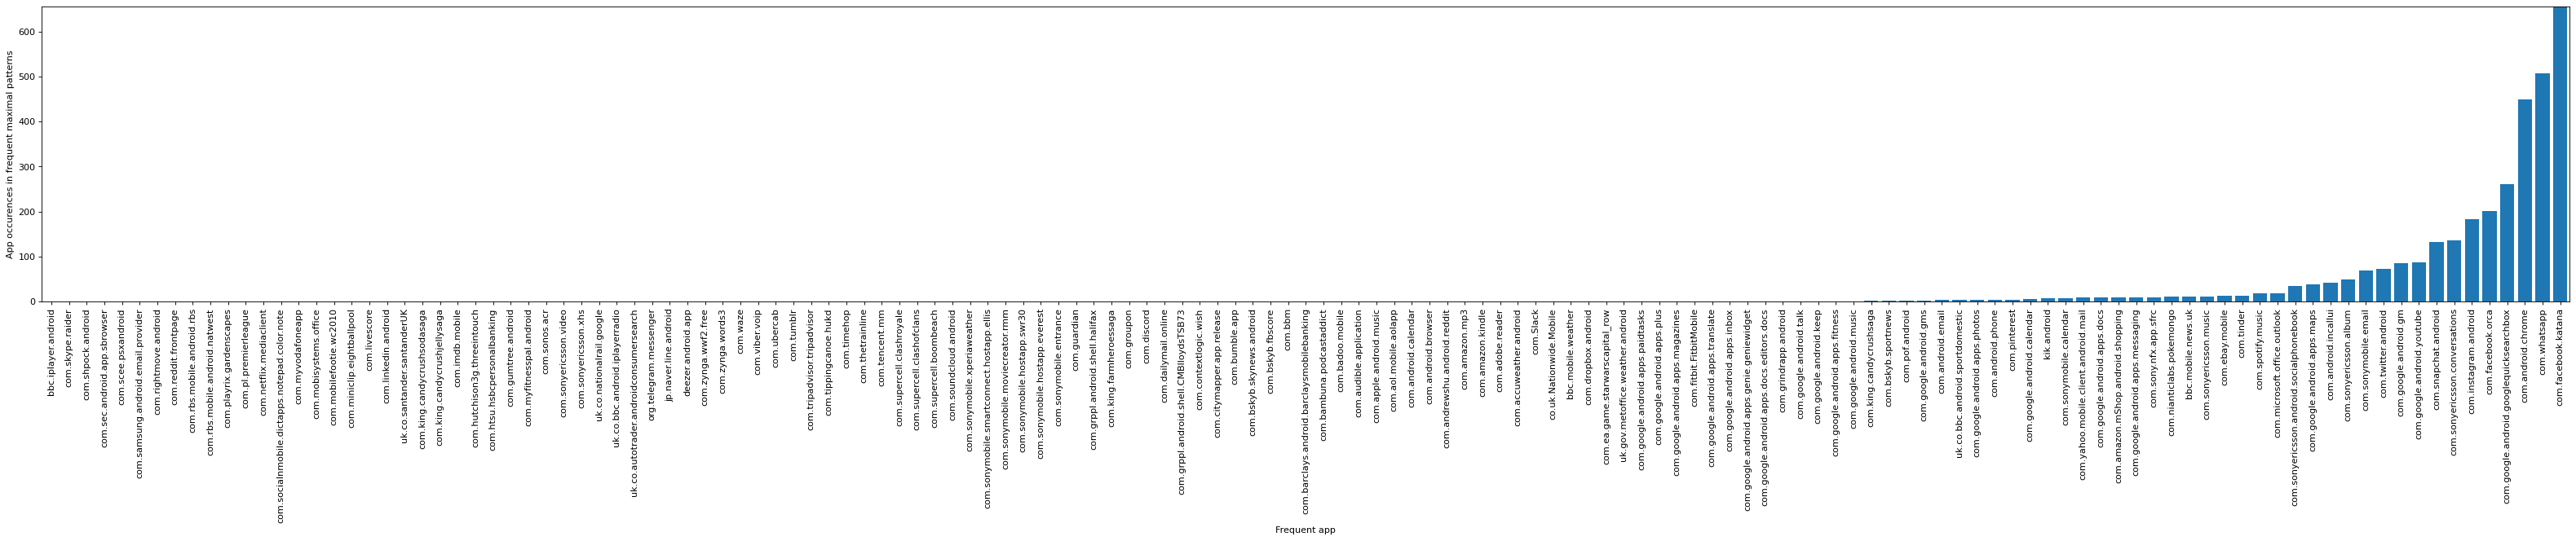

In [12]:
plt.figure(figsize=(50, 6), dpi=80)
bins=plt.bar(output_app_count.index,output_app_count)
plt.ylabel("App occurences in frequent maximal patterns")
plt.xlabel("Frequent app")
plt.xticks(rotation=90) 
plt.margins(0.001)
plt.show()

In [13]:
print("Number of frequent apps occuring once:",output_app_count[output_app_count==1].shape[0])

Number of frequent apps occuring once: 103


In [16]:
set(output_coverage_app_count[output_coverage_app_count==1].index)-set(output_app_count[output_app_count==1].index)

set()

In [18]:
patterns_longer_than_1=output[output.pattern_length!=1]
patterns_longer_than_1[patterns_longer_than_1.pattern.str.contains('|'.join(output_app_count[output_app_count==1].index))]

,pattern,sup,pattern_length
478,"['com.sonymobile.xperiaweather', 'com.android.chrome']",77300,2
577,"['com.reddit.frontpage', 'com.android.chrome']",71338,2
664,"['com.viber.voip', 'com.facebook.katana']",67107,2
764,"['com.facebook.katana', 'com.dailymail.online']",63024,2
777,"['com.whatsapp', 'com.sonyericsson.video']",62527,2
883,"['com.fitbit.FitbitMobile', 'com.facebook.katana']",59028,2
898,"['com.facebook.katana', 'com.barclays.android.barclaysmobilebanking']",58423,2
907,"['com.google.android.apps.genie.geniewidget', 'com.android.chrome']",58185,2
993,"['com.facebook.katana', 'bbc.mobile.weather']",55782,2
1121,"['com.linkedin.android', 'com.android.chrome']",52669,2


In [19]:
patterns_longer_than_1_coverage=output_coverage[output_coverage.pattern_length!=1]
patterns_longer_than_1_coverage[patterns_longer_than_1_coverage.pattern.str.contains('|'.join(output_coverage_app_count[output_coverage_app_count==1].index))]

,pattern,sup,pattern_length
494,"['com.sonymobile.xperiaweather', 'com.android.chrome']",77300,2
597,"['com.reddit.frontpage', 'com.android.chrome']",71338,2
684,"['com.viber.voip', 'com.facebook.katana']",67107,2
784,"['com.facebook.katana', 'com.dailymail.online']",63024,2
798,"['com.whatsapp', 'com.sonyericsson.video']",62527,2
903,"['com.fitbit.FitbitMobile', 'com.facebook.katana']",59028,2
918,"['com.facebook.katana', 'com.barclays.android.barclaysmobilebanking']",58423,2
927,"['com.google.android.apps.genie.geniewidget', 'com.android.chrome']",58185,2
1016,"['com.facebook.katana', 'bbc.mobile.weather']",55782,2


In [20]:
output_app_count[output_app_count.isin(output_app_count.nlargest(10))].sort_values(ascending=False)

com.facebook.katana                        655.0
com.whatsapp                               507.0
com.android.chrome                         450.0
com.google.android.googlequicksearchbox    261.0
com.facebook.orca                          201.0
com.instagram.android                      183.0
com.sonyericsson.conversations             136.0
com.snapchat.android                       133.0
com.google.android.youtube                  87.0
com.google.android.gm                       85.0
dtype: float64

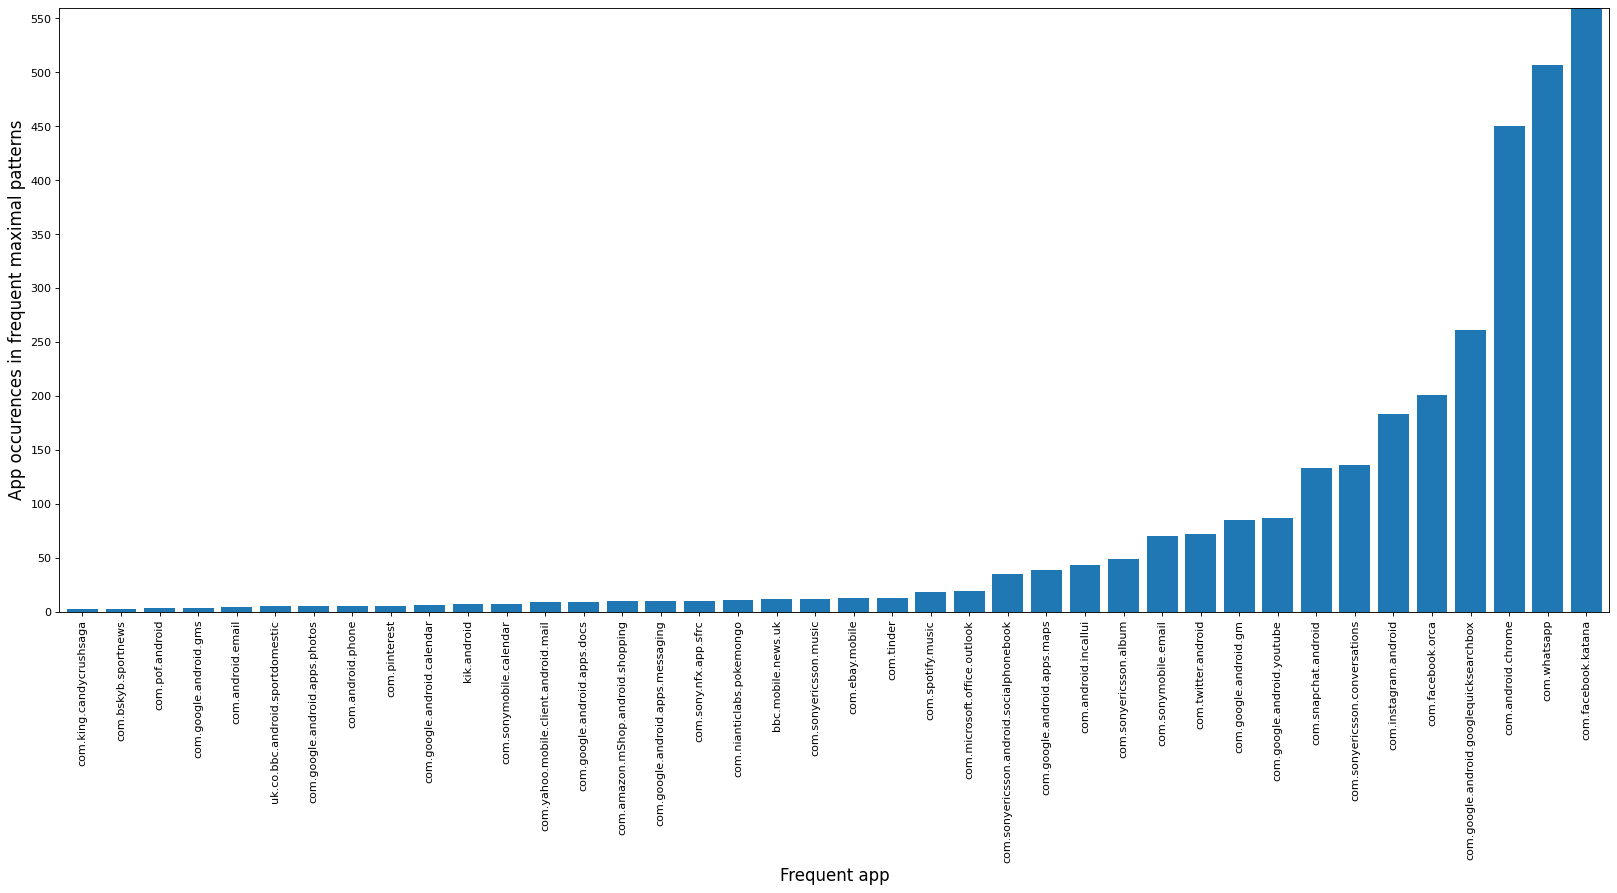

In [23]:
plt.figure(figsize=(25, 10), dpi=80)
bins=plt.bar(output_app_count[output_app_count>1].index,output_app_count[output_app_count>1])
plt.ylabel("App occurences in frequent maximal patterns",fontsize=15)
plt.xlabel("Frequent app",fontsize=15)
plt.xticks(rotation=90,fontsize=10) 
plt.yticks(np.arange(0, 560, 50),fontsize=10)
plt.ylim(0,560)
plt.margins(0.005)
plt.savefig("app_count_in_frequent_patterns_0_01_frequency_no_split.pdf", 
               bbox_inches='tight', 
               transparent=True,
               pad_inches=1)
plt.show()

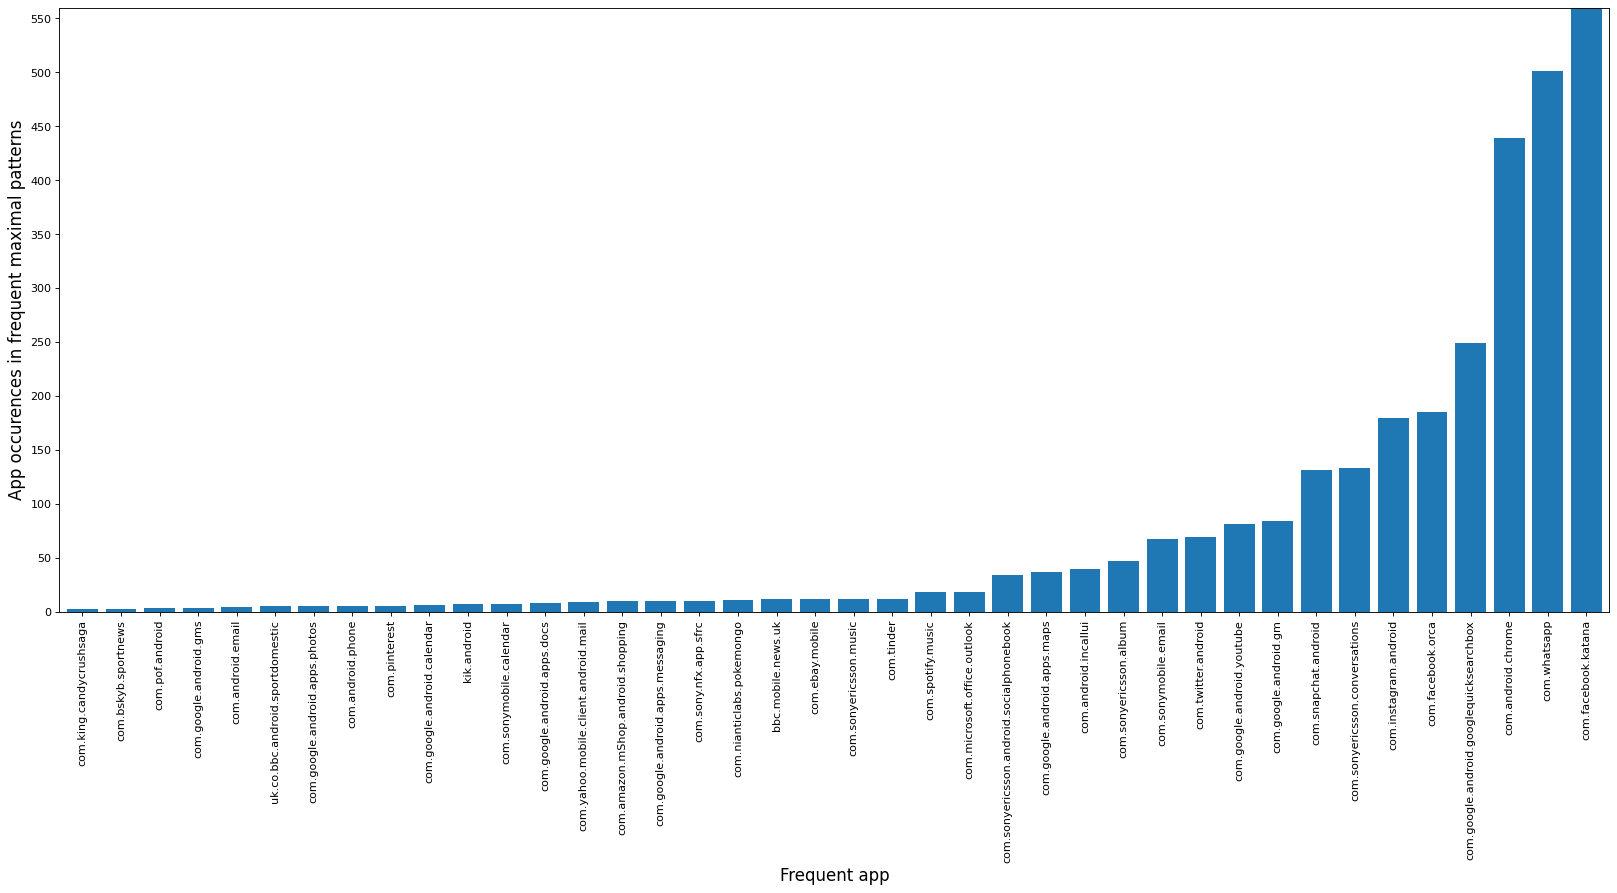

In [22]:
plt.figure(figsize=(25, 10), dpi=80)
bins=plt.bar(output_coverage_app_count[output_coverage_app_count>1].index,output_coverage_app_count[output_coverage_app_count>1])
plt.ylabel("App occurences in frequent maximal patterns",fontsize=15)
plt.xlabel("Frequent app",fontsize=15)
plt.xticks(rotation=90,fontsize=10) 
plt.yticks(np.arange(0, 560, 50),fontsize=10)
plt.ylim(0,560)
plt.margins(0.005)
plt.savefig("app_count_in_frequent_patterns_96coverage_no_split.pdf", 
               bbox_inches='tight', 
               transparent=True,
               pad_inches=1)
plt.show()

Again the results are very similar, for both approaches. We now try to focus on the different patterns.

In [24]:
print("Number of patterns which are is not not found with the coverage infrequency:",len(set(output.pattern)-set(output_coverage.pattern)))
print("Number of patterns which are is not not found with the percent infrequency:",len(set(output_coverage.pattern)-set(output.pattern)))
print("Number of patterns which occur in both:",len(set(output_coverage.pattern).intersection(set(output.pattern))))

Number of patterns which are is not not found with the coverage infrequency: 55
Number of patterns which are is not not found with the percent infrequency: 20
Number of patterns which occur in both: 1068


We see that the two only differ by a few patterns while the majority of the patterns found with the two approaches are the same.\
We here take a look at the patterns which are only found to be frequent using one of the methods.

In [25]:
print("Patterns which are only found using the percentage dedintion of infrequency:")
output[output.pattern.isin(set(output.pattern)-set(output_coverage.pattern))]

Patterns which are only found using the percentage dedintion of infrequency:


,pattern,sup,pattern_length
1067,"['com.facebook.katana', 'com.facebook.katana', 'com.facebook.katana', 'com.snapchat.android']",53934,4
1068,"['com.android.chrome', 'com.facebook.orca', 'com.instagram.android']",53927,3
1069,"['com.whatsapp', 'com.instagram.android', 'com.whatsapp', 'com.android.chrome']",53806,4
1070,"['com.facebook.katana', 'com.facebook.katana', 'com.whatsapp', 'com.whatsapp', 'com.whatsapp']",53792,5
1071,"['com.android.chrome', 'com.sonyericsson.conversations', 'com.android.chrome', 'com.sonyericsson.conversations']",53788,4
1072,"['com.android.chrome', 'com.twitter.android', 'com.whatsapp']",53786,3
1074,"['com.android.chrome', 'com.snapchat.android', 'com.whatsapp']",53780,3
1075,"['com.sonymobile.email', 'com.whatsapp', 'com.android.chrome']",53767,3
1076,"['com.facebook.katana', 'com.facebook.katana', 'com.facebook.katana', 'com.facebook.orca', 'com.facebook.katana']",53764,5
1077,"['com.google.android.apps.maps', 'com.android.chrome', 'com.google.android.googlequicksearchbox']",53734,3


In [26]:
print("Patterns which are only found using the coverage definition of infrequency:")
output_coverage[output_coverage.pattern.isin(set(output_coverage.pattern)-set(output.pattern))]

Patterns which are only found using the coverage definition of infrequency:


,pattern,sup,pattern_length
2,['com.linkedin.android'],270103,1
67,"['com.facebook.katana', 'com.instagram.android', 'com.snapchat.android']",149892,3
80,"['com.instagram.android', 'com.snapchat.android', 'com.facebook.katana']",143517,3
102,"['com.whatsapp', 'com.google.android.googlequicksearchbox', 'com.android.chrome', 'com.google.android.googlequicksearchbox']",133698,4
113,"['com.instagram.android', 'com.facebook.orca', 'com.facebook.katana']",129184,3
146,"['com.android.chrome', 'com.android.chrome', 'com.sonyericsson.conversations']",119956,3
177,"['com.android.chrome', 'com.facebook.orca', 'com.facebook.orca']",113189,3
182,"['com.instagram.android', 'com.whatsapp', 'com.android.chrome']",112147,3
190,"['com.android.chrome', 'com.sonyericsson.conversations', 'com.sonyericsson.conversations']",110815,3
211,"['com.whatsapp', 'com.instagram.android', 'com.whatsapp', 'com.whatsapp']",107290,4


Since they the results only show maximal patterns, it is interesting if any of these non overlaping maximal patterns, do occur as non-maximal frequent patterns in the other.

In [27]:
#output[output.pattern.isin(set(output.pattern)-set(output_coverage.pattern))].pattern.str.replace(r'[\[\]\']','')

<ipython-input-27-10cff51aca26>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  output[output.pattern.isin(set(output.pattern)-set(output_coverage.pattern))].pattern.str.replace(r'[\[\]\']','')


1067                                                                                                                           com.facebook.katana, com.facebook.katana, com.facebook.katana, com.snapchat.android
1068                                                                                                                                                  com.android.chrome, com.facebook.orca, com.instagram.android
1069                                                                                                                                         com.whatsapp, com.instagram.android, com.whatsapp, com.android.chrome
1070                                                                                                                            com.facebook.katana, com.facebook.katana, com.whatsapp, com.whatsapp, com.whatsapp
1071                                                                                                        com.android.chrome, com.sonyericsson.conversatio

In [20]:
#output[output.pattern.isin(set(output.pattern)-set(output_coverage.pattern))].pattern.str.replace(r'[\[\]\']','')

<ipython-input-20-10cff51aca26>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  output[output.pattern.isin(set(output.pattern)-set(output_coverage.pattern))].pattern.str.replace(r'[\[\]\']','')


83                                                com.facebook.orca, com.facebook.katana, com.instagram.android
94                                                      com.whatsapp, com.facebook.katana, com.snapchat.android
152                                                     com.facebook.katana, com.whatsapp, com.snapchat.android
645                          com.whatsapp, com.whatsapp, com.facebook.katana, com.facebook.katana, com.whatsapp
992                                                          com.sonymobile.email, com.google.android.apps.docs
995     com.google.android.googlequicksearchbox, com.sonyericsson.android.socialphonebook, com.android.incallui
998                                                          com.sonyericsson.music, com.google.android.youtube
999                                                                 com.instagram.android, com.android.incallui
1001                                                   com.google.android.apps.maps, com.google.android.

In [34]:
output[output.pattern.isin(set(output_coverage.pattern)-set(output.pattern))]

,pattern,sup,pattern_length


In [32]:
output_coverage['pattern']=output_coverage.pattern.str.replace(r'[\[\]\']','')
output['pattern']=output.pattern.str.replace(r'[\[\]\']','')

<ipython-input-32-a4dff1fcb327>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  output_coverage['pattern']=output_coverage.pattern.str.replace(r'[\[\]\']','')
<ipython-input-32-a4dff1fcb327>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  output['pattern']=output.pattern.str.replace(r'[\[\]\']','')


We identify the set of maximal patterns, which are not found with the coverage definition of infrequency.

In [40]:
maximal_patterns_not_with_coverage=output[output.pattern.isin(set(output.pattern)-set(output_coverage.pattern))]

In [64]:
maximal_patterns_not_with_coverage=maximal_patterns_not_with_coverage.join(pd.DataFrame(maximal_patterns_not_with_coverage.pattern\
.apply(lambda l: output_coverage.pattern.str.contains(l).any())).rename(columns={'pattern':'in maximal'}))

In [65]:
maximal_patterns_not_with_coverage

,pattern,sup,pattern_length,in maximal
1067,"com.facebook.katana, com.facebook.katana, com.facebook.katana, com.snapchat.android",53934,4,False
1068,"com.android.chrome, com.facebook.orca, com.instagram.android",53927,3,False
1069,"com.whatsapp, com.instagram.android, com.whatsapp, com.android.chrome",53806,4,False
1070,"com.facebook.katana, com.facebook.katana, com.whatsapp, com.whatsapp, com.whatsapp",53792,5,False
1071,"com.android.chrome, com.sonyericsson.conversations, com.android.chrome, com.sonyericsson.conversations",53788,4,False
1072,"com.android.chrome, com.twitter.android, com.whatsapp",53786,3,False
1074,"com.android.chrome, com.snapchat.android, com.whatsapp",53780,3,False
1075,"com.sonymobile.email, com.whatsapp, com.android.chrome",53767,3,False
1076,"com.facebook.katana, com.facebook.katana, com.facebook.katana, com.facebook.orca, com.facebook.katana",53764,5,False
1077,"com.google.android.apps.maps, com.android.chrome, com.google.android.googlequicksearchbox",53734,3,False


In [68]:
maximal_patterns_not_with_percentage=output_coverage[output_coverage.pattern.isin(set(output_coverage.pattern)-set(output.pattern))]

maximal_patterns_not_with_percentage=maximal_patterns_not_with_percentage.join(pd.DataFrame(maximal_patterns_not_with_percentage.pattern\
.apply(lambda l: output.pattern.str.contains(l).any())).rename(columns={'pattern':'in maximal'}))

maximal_patterns_not_with_percentage

,pattern,sup,pattern_length,in maximal
2,com.linkedin.android,270103,1,True
67,"com.facebook.katana, com.instagram.android, com.snapchat.android",149892,3,True
80,"com.instagram.android, com.snapchat.android, com.facebook.katana",143517,3,True
102,"com.whatsapp, com.google.android.googlequicksearchbox, com.android.chrome, com.google.android.googlequicksearchbox",133698,4,True
113,"com.instagram.android, com.facebook.orca, com.facebook.katana",129184,3,False
146,"com.android.chrome, com.android.chrome, com.sonyericsson.conversations",119956,3,False
177,"com.android.chrome, com.facebook.orca, com.facebook.orca",113189,3,False
182,"com.instagram.android, com.whatsapp, com.android.chrome",112147,3,True
190,"com.android.chrome, com.sonyericsson.conversations, com.sonyericsson.conversations",110815,3,False
211,"com.whatsapp, com.instagram.android, com.whatsapp, com.whatsapp",107290,4,False


In [73]:
maximal_patterns_not_with_percentage[maximal_patterns_not_with_percentage['in maximal'].apply(lambda l: not l)].shape

(13, 4)

We see that 7 out of the 20 patterns only found to be maximal with the coverage definition are found as frequent subpatterns in set of maximal patterns found with the percentage difinition. However due to the nature of maximal patterns, a maximal pattern a b c, also contains the pattern a c. We therefore check the remaining 13 patterns, if they are included in such a way in the set of maximal patterns found with the percentage definition.

In [75]:
maximal_patterns_not_with_percentage[maximal_patterns_not_with_percentage['in maximal']!=True]

,pattern,sup,pattern_length,in maximal
113,"com.instagram.android, com.facebook.orca, com.facebook.katana",129184,3,False
146,"com.android.chrome, com.android.chrome, com.sonyericsson.conversations",119956,3,False
177,"com.android.chrome, com.facebook.orca, com.facebook.orca",113189,3,False
190,"com.android.chrome, com.sonyericsson.conversations, com.sonyericsson.conversations",110815,3,False
211,"com.whatsapp, com.instagram.android, com.whatsapp, com.whatsapp",107290,4,False
219,"com.whatsapp, com.whatsapp, com.instagram.android, com.whatsapp",105351,4,False
396,"com.whatsapp, com.android.chrome, com.google.android.googlequicksearchbox, com.android.chrome",84707,4,False
422,"com.whatsapp, com.google.android.googlequicksearchbox, com.android.chrome, com.android.chrome",82521,4,False
469,"com.facebook.katana, com.facebook.orca, com.facebook.orca, com.facebook.orca",78882,4,False
523,"com.facebook.orca, com.facebook.orca, com.facebook.katana, com.facebook.katana",75374,4,False


We first look at the patterns of length 3

In [77]:
length_3_patterns_maximal_patterns_not_with_percentage=maximal_patterns_not_with_percentage\
[(maximal_patterns_not_with_percentage['in maximal']!=True)&(maximal_patterns_not_with_percentage.pattern_length==3)]

In [80]:
length_3_patterns_maximal_patterns_not_with_percentage[[1,2,3]]=length_3_patterns_maximal_patterns_not_with_percentage.pattern.str.split(',',expand=True)
length_3_patterns_maximal_patterns_not_with_percentage

,pattern,sup,pattern_length,in maximal,1,2,3
113,"com.instagram.android, com.facebook.orca, com.facebook.katana",129184,3,False,com.instagram.android,com.facebook.orca,com.facebook.katana
146,"com.android.chrome, com.android.chrome, com.sonyericsson.conversations",119956,3,False,com.android.chrome,com.android.chrome,com.sonyericsson.conversations
177,"com.android.chrome, com.facebook.orca, com.facebook.orca",113189,3,False,com.android.chrome,com.facebook.orca,com.facebook.orca
190,"com.android.chrome, com.sonyericsson.conversations, com.sonyericsson.conversations",110815,3,False,com.android.chrome,com.sonyericsson.conversations,com.sonyericsson.conversations


In [126]:
length_3_patterns_maximal_patterns_not_with_percentage.apply(lambda l:output.pattern.str.contains(r'.*{}.*{}.*{}'.format(l[1],l[2],l[3])).any(),axis=1)

113    True
146    True
177    True
190    True
dtype: bool

We see that all of the remaining length 3 patterns, are found as frequent patterns included in the maximal patterns found with the percentage definition.\
We now look at the maximal patterns only found with the coverage definition, and with length 4.

In [128]:
length_4_patterns_maximal_patterns_not_with_percentage=maximal_patterns_not_with_percentage\
[(maximal_patterns_not_with_percentage['in maximal']!=True)&(maximal_patterns_not_with_percentage.pattern_length==4)]
length_4_patterns_maximal_patterns_not_with_percentage[[1,2,3,4]]=length_4_patterns_maximal_patterns_not_with_percentage.pattern.str.split(',',expand=True)
length_4_patterns_maximal_patterns_not_with_percentage

/home/s164574/.conda/envs/myenv/lib/python3.8/site-packages/pandas/core/frame.py:3636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,pattern,sup,pattern_length,in maximal,1,2,3,4
211,"com.whatsapp, com.instagram.android, com.whatsapp, com.whatsapp",107290,4,False,com.whatsapp,com.instagram.android,com.whatsapp,com.whatsapp
219,"com.whatsapp, com.whatsapp, com.instagram.android, com.whatsapp",105351,4,False,com.whatsapp,com.whatsapp,com.instagram.android,com.whatsapp
396,"com.whatsapp, com.android.chrome, com.google.android.googlequicksearchbox, com.android.chrome",84707,4,False,com.whatsapp,com.android.chrome,com.google.android.googlequicksearchbox,com.android.chrome
422,"com.whatsapp, com.google.android.googlequicksearchbox, com.android.chrome, com.android.chrome",82521,4,False,com.whatsapp,com.google.android.googlequicksearchbox,com.android.chrome,com.android.chrome
469,"com.facebook.katana, com.facebook.orca, com.facebook.orca, com.facebook.orca",78882,4,False,com.facebook.katana,com.facebook.orca,com.facebook.orca,com.facebook.orca
523,"com.facebook.orca, com.facebook.orca, com.facebook.katana, com.facebook.katana",75374,4,False,com.facebook.orca,com.facebook.orca,com.facebook.katana,com.facebook.katana
549,"com.whatsapp, com.instagram.android, com.instagram.android, com.whatsapp",73392,4,False,com.whatsapp,com.instagram.android,com.instagram.android,com.whatsapp
604,"com.whatsapp, com.google.android.googlequicksearchbox, com.google.android.googlequicksearchbox, com.android.chrome",71108,4,False,com.whatsapp,com.google.android.googlequicksearchbox,com.google.android.googlequicksearchbox,com.android.chrome


In [129]:
length_4_patterns_maximal_patterns_not_with_percentage.apply(lambda l:output.pattern.str.contains(r'.*{}.*{}.*{}.*{}'.format(l[1],l[2],l[3],l[4])).any(),axis=1)

211    True
219    True
396    True
422    True
469    True
523    True
549    True
604    True
dtype: bool

We see that they as well are all found as subpatterns of maximal patterns found with the percentage definition.\
At last we look at the pattern of length 5.

In [135]:
length_5_patterns_maximal_patterns_not_with_percentage=maximal_patterns_not_with_percentage\
[(maximal_patterns_not_with_percentage['in maximal']!=True)&(maximal_patterns_not_with_percentage.pattern_length==5)]
length_5_patterns_maximal_patterns_not_with_percentage[[1,2,3,4,5]]=length_5_patterns_maximal_patterns_not_with_percentage.pattern.str.split(',',expand=True)
length_5_patterns_maximal_patterns_not_with_percentage

/home/s164574/.conda/envs/myenv/lib/python3.8/site-packages/pandas/core/frame.py:3636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,pattern,sup,pattern_length,in maximal,1,2,3,4,5
819,"com.google.android.googlequicksearchbox, com.google.android.googlequicksearchbox, com.android.chrome, com.android.chrome, com.google.android.googlequicksearchbox",61716,5,False,com.google.android.googlequicksearchbox,com.google.android.googlequicksearchbox,com.android.chrome,com.android.chrome,com.google.android.googlequicksearchbox


In [136]:
length_5_patterns_maximal_patterns_not_with_percentage.apply(lambda l:output.pattern.str.contains(r'.*{}.*{}.*{}.*{}.*{}'.format(l[1],l[2],l[3],l[4],l[5])).any(),axis=1)

819    True
dtype: bool

In [130]:
length_5_patterns_maximal_patterns_not_with_percentage=maximal_patterns_not_with_percentage\
[(maximal_patterns_not_with_percentage['in maximal']!=True)&(maximal_patterns_not_with_percentage.pattern_length==5)]
length_5_patterns_maximal_patterns_not_with_percentage[[1,2,3,4,5]]=length_5_patterns_maximal_patterns_not_with_percentage.pattern.str.split(',',expand=True)
length_5_patterns_maximal_patterns_not_with_percentage

/home/s164574/.conda/envs/myenv/lib/python3.8/site-packages/pandas/core/frame.py:3636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,pattern,sup,pattern_length,in maximal,1,2,3,4,5
819,"com.google.android.googlequicksearchbox, com.google.android.googlequicksearchbox, com.android.chrome, com.android.chrome, com.google.android.googlequicksearchbox",61716,5,False,com.google.android.googlequicksearchbox,com.google.android.googlequicksearchbox,com.android.chrome,com.android.chrome,com.google.android.googlequicksearchbox


In [132]:
length_5_patterns_maximal_patterns_not_with_percentage.apply(lambda l:output.pattern.str.contains(r'.*{}.*{}.*{}.*{}.*{}'.format(l[1],l[2],l[3],l[4],l[5])).any(),axis=1)

819    True
dtype: bool

We see that indeed all the maximal patterns found with the coverage definition are also found with percentage definition, just not as maximal patterns.

We now investigate if this is also the case for any of the maximal patterns only found using the percentage definition.

In [134]:
maximal_patterns_not_with_coverage.pattern_length.unique()

array([4, 3, 5, 2, 6])

We start by looking at the patterns of length 2.

In [137]:
length_2_patterns_maximal_patterns_not_with_coverage=maximal_patterns_not_with_coverage\
[(maximal_patterns_not_with_coverage['in maximal']!=True)&(maximal_patterns_not_with_coverage.pattern_length==2)]
length_2_patterns_maximal_patterns_not_with_coverage[[1,2]]=length_2_patterns_maximal_patterns_not_with_coverage.pattern.str.split(',',expand=True)
length_2_patterns_maximal_patterns_not_with_coverage

/home/s164574/.conda/envs/myenv/lib/python3.8/site-packages/pandas/core/frame.py:3636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,pattern,sup,pattern_length,in maximal,1,2
1085,"com.google.android.apps.docs, com.google.android.googlequicksearchbox",53617,2,False,com.google.android.apps.docs,com.google.android.googlequicksearchbox
1090,"com.facebook.orca, com.tinder",53561,2,False,com.facebook.orca,com.tinder
1093,"com.twitter.android, com.microsoft.office.outlook",53477,2,False,com.twitter.android,com.microsoft.office.outlook
1103,"com.google.android.youtube, com.android.incallui",53161,2,False,com.google.android.youtube,com.android.incallui
1121,"com.linkedin.android, com.android.chrome",52669,2,False,com.linkedin.android,com.android.chrome
1122,"com.ebay.mobile, com.sonyericsson.conversations",52650,2,False,com.ebay.mobile,com.sonyericsson.conversations


In [142]:
length_2_patterns_maximal_patterns_not_with_coverage.apply(lambda l:output_coverage.pattern.str.contains(r'.*{}.*{}.*'.format(l[1],l[2])).any(),axis=1)

1085    False
1090    False
1093    False
1103    False
1121    False
1122    False
dtype: bool

We see that non of the length two maximal patterns are found to be part of a maximal pattern found with the coverager definition 

In [143]:
length_3_patterns_maximal_patterns_not_with_coverage=maximal_patterns_not_with_coverage\
[(maximal_patterns_not_with_coverage['in maximal']!=True)&(maximal_patterns_not_with_coverage.pattern_length==3)]
length_3_patterns_maximal_patterns_not_with_coverage[[1,2,3]]=length_3_patterns_maximal_patterns_not_with_coverage.pattern.str.split(',',expand=True)
length_3_patterns_maximal_patterns_not_with_coverage

/home/s164574/.conda/envs/myenv/lib/python3.8/site-packages/pandas/core/frame.py:3636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,pattern,sup,pattern_length,in maximal,1,2,3
1068,"com.android.chrome, com.facebook.orca, com.instagram.android",53927,3,False,com.android.chrome,com.facebook.orca,com.instagram.android
1072,"com.android.chrome, com.twitter.android, com.whatsapp",53786,3,False,com.android.chrome,com.twitter.android,com.whatsapp
1074,"com.android.chrome, com.snapchat.android, com.whatsapp",53780,3,False,com.android.chrome,com.snapchat.android,com.whatsapp
1075,"com.sonymobile.email, com.whatsapp, com.android.chrome",53767,3,False,com.sonymobile.email,com.whatsapp,com.android.chrome
1077,"com.google.android.apps.maps, com.android.chrome, com.google.android.googlequicksearchbox",53734,3,False,com.google.android.apps.maps,com.android.chrome,com.google.android.googlequicksearchbox
1082,"com.facebook.katana, com.google.android.youtube, com.facebook.orca",53643,3,False,com.facebook.katana,com.google.android.youtube,com.facebook.orca
1091,"com.android.chrome, com.facebook.orca, com.google.android.googlequicksearchbox",53559,3,False,com.android.chrome,com.facebook.orca,com.google.android.googlequicksearchbox
1092,"com.facebook.orca, com.android.chrome, com.instagram.android",53508,3,False,com.facebook.orca,com.android.chrome,com.instagram.android
1095,"com.google.android.googlequicksearchbox, com.snapchat.android, com.facebook.katana",53444,3,False,com.google.android.googlequicksearchbox,com.snapchat.android,com.facebook.katana
1096,"com.sonyericsson.conversations, com.facebook.katana, com.sonymobile.email",53354,3,False,com.sonyericsson.conversations,com.facebook.katana,com.sonymobile.email


In [144]:
length_3_patterns_maximal_patterns_not_with_coverage.apply(lambda l:output_coverage.pattern.str.contains(r'.*{}.*{}.*{}.*'.format(l[1],l[2],l[3])).any(),axis=1)

1068    False
1072    False
1074    False
1075    False
1077    False
1082    False
1091    False
1092    False
1095    False
1096    False
1097    False
1098    False
1099    False
1101    False
1102    False
1106    False
1107    False
1108    False
1111    False
1112    False
1114    False
1115    False
1118    False
1119    False
1120    False
dtype: bool

The same is the case for the length 3 maximal patterns.

In [145]:
length_4_patterns_maximal_patterns_not_with_coverage=maximal_patterns_not_with_coverage\
[(maximal_patterns_not_with_coverage['in maximal']!=True)&(maximal_patterns_not_with_coverage.pattern_length==4)]
length_4_patterns_maximal_patterns_not_with_coverage[[1,2,3,4]]=length_4_patterns_maximal_patterns_not_with_coverage.pattern.str.split(',',expand=True)
length_4_patterns_maximal_patterns_not_with_coverage

length_4_patterns_maximal_patterns_not_with_coverage.apply(lambda l:output_coverage.pattern.str.contains(r'.*{}.*{}.*{}.*{}.*'.format(l[1],l[2],l[3],l[4])).any(),axis=1)

/home/s164574/.conda/envs/myenv/lib/python3.8/site-packages/pandas/core/frame.py:3636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


1067    False
1069    False
1071    False
1080    False
1083    False
1084    False
1086    False
1087    False
1094    False
1100    False
1104    False
1105    False
1109    False
1117    False
dtype: bool

In [147]:
length_5_patterns_maximal_patterns_not_with_coverage=maximal_patterns_not_with_coverage\
[(maximal_patterns_not_with_coverage['in maximal']!=True)&(maximal_patterns_not_with_coverage.pattern_length==5)]
length_5_patterns_maximal_patterns_not_with_coverage[[1,2,3,4,5]]=length_5_patterns_maximal_patterns_not_with_coverage.pattern.str.split(',',expand=True)
length_5_patterns_maximal_patterns_not_with_coverage

length_5_patterns_maximal_patterns_not_with_coverage.apply(lambda l:output_coverage.pattern.str.contains(r'.*{}.*{}.*{}.*{}.*{}.*'.format(l[1],l[2],l[3],l[4],l[5])).any(),axis=1)

1070    False
1076    False
1078    False
1079    False
1081    False
1088    False
1089    False
1110    False
1113    False
dtype: bool

In [148]:
length_6_patterns_maximal_patterns_not_with_coverage=maximal_patterns_not_with_coverage\
[(maximal_patterns_not_with_coverage['in maximal']!=True)&(maximal_patterns_not_with_coverage.pattern_length==6)]
length_6_patterns_maximal_patterns_not_with_coverage[[1,2,3,4,5,6]]=length_6_patterns_maximal_patterns_not_with_coverage.pattern.str.split(',',expand=True)
length_6_patterns_maximal_patterns_not_with_coverage

length_6_patterns_maximal_patterns_not_with_coverage.apply(lambda l:output_coverage.pattern.str.contains(r'.*{}.*{}.*{}.*{}.*{}.*{}.*'.format(l[1],l[2],l[3],l[4],l[5],l[6])).any(),axis=1)

1116    False
dtype: bool

We see that 55 maximal patterns are not found as part of the maximal patterns.

In [151]:
length_6_patterns_maximal_patterns_not_with_coverage

,pattern,sup,pattern_length,in maximal,1,2,3,4,5,6
1116,"com.google.android.googlequicksearchbox, com.google.android.googlequicksearchbox, com.android.chrome, com.google.android.googlequicksearchbox, com.android.chrome, com.google.android.googlequicksearchbox",52815,6,False,com.google.android.googlequicksearchbox,com.google.android.googlequicksearchbox,com.android.chrome,com.google.android.googlequicksearchbox,com.android.chrome,com.google.android.googlequicksearchbox


We see that while the above length six mximal pattern was not found with the coverage definition of frequency, it is very similar to the other maximal patterns of length six discovered.

In [152]:
length_5_patterns_maximal_patterns_not_with_coverage

,pattern,sup,pattern_length,in maximal,1,2,3,4,5
1070,"com.facebook.katana, com.facebook.katana, com.whatsapp, com.whatsapp, com.whatsapp",53792,5,False,com.facebook.katana,com.facebook.katana,com.whatsapp,com.whatsapp,com.whatsapp
1076,"com.facebook.katana, com.facebook.katana, com.facebook.katana, com.facebook.orca, com.facebook.katana",53764,5,False,com.facebook.katana,com.facebook.katana,com.facebook.katana,com.facebook.orca,com.facebook.katana
1078,"com.whatsapp, com.whatsapp, com.facebook.katana, com.facebook.katana, com.facebook.katana",53731,5,False,com.whatsapp,com.whatsapp,com.facebook.katana,com.facebook.katana,com.facebook.katana
1079,"com.facebook.orca, com.facebook.katana, com.facebook.orca, com.facebook.katana, com.facebook.katana",53700,5,False,com.facebook.orca,com.facebook.katana,com.facebook.orca,com.facebook.katana,com.facebook.katana
1081,"com.facebook.katana, com.facebook.katana, com.facebook.orca, com.facebook.katana, com.facebook.katana",53683,5,False,com.facebook.katana,com.facebook.katana,com.facebook.orca,com.facebook.katana,com.facebook.katana
1088,"com.whatsapp, com.google.android.googlequicksearchbox, com.android.chrome, com.google.android.googlequicksearchbox, com.android.chrome",53590,5,False,com.whatsapp,com.google.android.googlequicksearchbox,com.android.chrome,com.google.android.googlequicksearchbox,com.android.chrome
1089,"com.facebook.katana, com.facebook.orca, com.facebook.orca, com.facebook.katana, com.facebook.orca",53566,5,False,com.facebook.katana,com.facebook.orca,com.facebook.orca,com.facebook.katana,com.facebook.orca
1110,"com.whatsapp, com.instagram.android, com.whatsapp, com.instagram.android, com.whatsapp",52930,5,False,com.whatsapp,com.instagram.android,com.whatsapp,com.instagram.android,com.whatsapp
1113,"com.facebook.orca, com.facebook.katana, com.facebook.katana, com.facebook.orca, com.facebook.katana",52903,5,False,com.facebook.orca,com.facebook.katana,com.facebook.katana,com.facebook.orca,com.facebook.katana


In [156]:
length_6_patterns_maximal_patterns_not_with_coverage[[1,2,3,4,5,6]]=length_6_patterns_maximal_patterns_not_with_coverage.pattern.str.split(',',expand=True)

/home/s164574/.conda/envs/myenv/lib/python3.8/site-packages/pandas/core/frame.py:3636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [157]:
length_6_patterns_maximal_patterns_not_with_coverage.to_csv("unique_maximal_pattern_for_percentage_length6.csv",index=False)